In [125]:
# Import a library
import numpy as np
import pandas as pd
import docx
from datetime import datetime
import pyreadstat
import matplotlib.pyplot as plt

#  Read SPSS file

spss_file_path = ('Marketing Research.sav')

df, meta = pyreadstat.read_sav(spss_file_path, apply_value_formats=True)

# Save output as csv
csv_file_path =('Marketing Research.csv')
df.to_csv(csv_file_path, index=False)

# Get the shape (rows, columns)
print(f"Dataset shape: {df.shape}")

# Overview of data types and non-null counts
# print(df.info())

# Get variable labels from meta and set them as column names
variable_labels = meta.column_labels
df.columns = variable_labels  # Replace column names with variable labels


Dataset shape: (1400, 47)


## **DEMOGRAPHICS**

### **Race**

In [64]:
# # DEMOGRAPHICS
race=df['What is your race?'].value_counts()
print(race)

What is your race?
Caucasian          959
Black              217
Asian              127
Hispanic            87
Other                8
American Indian      2
Name: count, dtype: int64


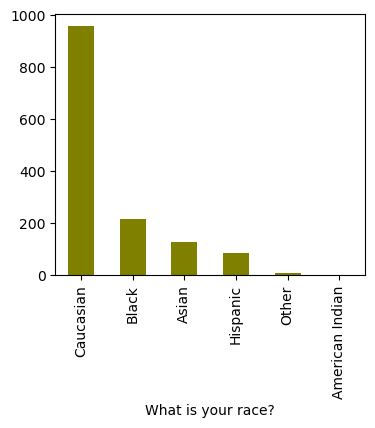

In [65]:
plt.figure(figsize=(4,3.4))
race.plot(kind='bar', color='olive')
plt.show()

### **Age**

In [66]:
# Count the occurrences of each age in the 'What is your age?' column
age = df['What is your age?'].value_counts()

# Define the bins (age ranges) and corresponding labels
bins = [20, 30, 40, 50, 60, 70]  # Bin edges representing the age ranges
labels = ['20–29', '30–39', '40–49', '50–59', '60–69']  # Labels for the corresponding age ranges

# Create a new column 'Age' that assigns each person to one of the defined age bins
df['Age'] = pd.cut(df['What is your age?'], bins=bins, labels=labels, right=False)
# The 'right=False' parameter means that the bin intervals are left-inclusive, i.e., the right edge is excluded.

# Count how many people fall into each age group defined by the bins
age = df['Age'].value_counts()

# Display the age group counts
print(age)


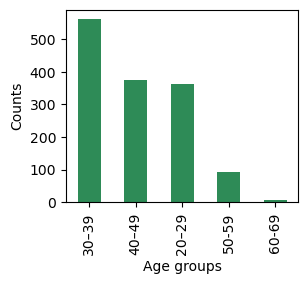

In [67]:
plt.figure(figsize=(3,2.5))
age.plot(kind='bar', color='seagreen')
plt.xlabel('Age groups')
plt.ylabel("Counts")
plt.show()

### **Marital Status**

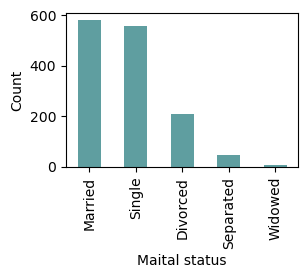

In [68]:

mar_status=df["What is your marital status?"].value_counts()
plt.figure(figsize=(3, 2))  # Set the desired size 
# Create the bar chart
mar_status.plot(kind='bar', color='cadetblue')
# plt.title('Marital Status')
plt.xlabel('Maital status')
plt.ylabel('Count')
plt.show()

### **Children**

In [128]:
# Replace 0 with NaN in the specified column
# df['How many children under the age of 18 are living with you?'] = df['How many children under the age of 18 are living with you?'].replace(np.nan,0)
children_statisctics=df['How many children under the age of 18 are living with you?'].describe()
children_statisctics

count    842.000000
mean       1.522565
std        1.018305
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: How many children under the age of 18 are living with you?, dtype: float64

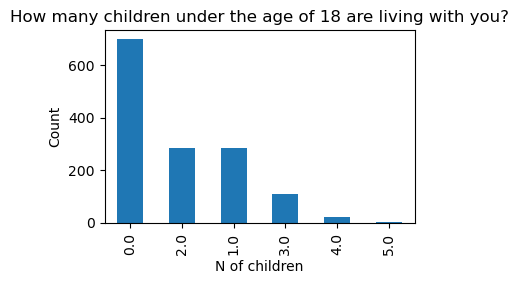

In [70]:
children_count=df['How many children under the age of 18 are living with you?'].value_counts()
plt.figure(figsize=(4, 2.5))  # Set the desired size 
# Create the bar chart
children_count.plot(kind='bar')
plt.title('How many children under the age of 18 are living with you?')
plt.xlabel('N of children')
plt.ylabel('Count')
plt.show()


### **Education**

['10%', '11%', '16%', '16%', '21%', '23%']


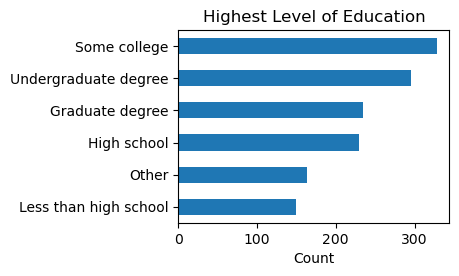

In [71]:
education=df['What is the highest level of education you have completed?'].value_counts().sort_values(ascending=True)
prcntg = [f"{int((x / len(df) * 100))}%" for x in education]
print(prcntg)
plt.figure(figsize=(3.5, 2.5))  # Set the desired size 
# Create the bar chart
education.plot(kind='barh')
plt.title('Highest Level of Education')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

### **Gender**

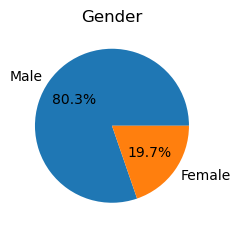

In [72]:
gender=df["Your gender is..."].value_counts()
plt.figure(figsize=(3.5, 2.5))  # Set the desired size 
labels = ['Male', 'Female']
gender.plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender')
plt.ylabel('')
plt.show()

### **Household Income**

Text(0, 0.5, '')

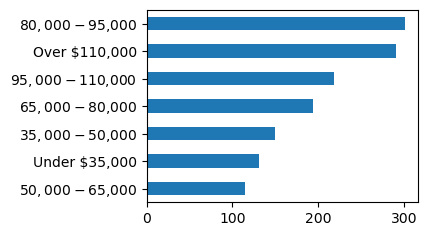

In [73]:
income=df['What range indicates your total household income before taxes last year?'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(3.5, 2.5))  # Set the desired size 
income.plot(kind='barh')
plt.ylabel('')

## **Attitudes Towards Using the Internet for Vehicle Purchases**

In [232]:

# Function to calculate the count and percentage of unique values in a column
def values_count(column):
    # Get the count of each unique value in the column
    count = column.value_counts()
    
    # Calculate the percentage for each value based on the total number of rows in the dataframe
    prcntgs = [f'{int(x / len(df) * 100)}' + '%' for x in count]
    
    # Create a DataFrame with the count and percentage of each unique value
    result = pd.DataFrame({
        column.name: count.index,  # The column name as the title of the first column
        'Count': count.values,     # The count of occurrences of each unique value
        'Percentage': prcntgs      # The calculated percentage for each unique value
    })
    
    # Print the column name for reference (optional)
    print(column.name)

    # Return the resulting DataFrame with counts and percentages
    return result


In [233]:
# 	The Internet is a good tool to use when researching an automobile purchase.
rsrch_auto_prchs=values_count(df['The Internet is a good tool to use when researching an automobile purchase.'])
rsrch_auto_prchs


The Internet is a good tool to use when researching an automobile purchase.


,The Internet is a good tool to use when researching an automobile purchase.,Count,Percentage
0,Disagree,361,25%
1,Neutral,336,24%
2,Agree,296,21%
3,Strongly Disagree,252,18%
4,Strongly Agree,155,11%


In [234]:
# The Internet should not be used to purchase vehicles.
intrnt_no_prchs_v=values_count(df['The Internet should not be used to purchase vehicles.'])
intrnt_no_prchs_v

The Internet should not be used to purchase vehicles.


,The Internet should not be used to purchase vehicles.,Count,Percentage
0,Neutral,420,30%
1,Strongly Agree,323,23%
2,Strongly Disagree,253,18%
3,Agree,205,14%
4,Disagree,199,14%


In [235]:
dlrship= values_count(df['Online dealerships are just another way of getting you into the traditional dealership.'])
dlrship

Online dealerships are just another way of getting you into the traditional dealership.


,Online dealerships are just another way of getting you into the traditional dealership.,Count,Percentage
0,Strongly Disagree,465,33%
1,Disagree,455,32%
2,Neutral,345,24%
3,Agree,114,8%
4,Strongly Agree,21,1%


In [237]:
negotiate=values_count(df['People feel they can negotiate a better price by talking with a sales representative in person.'])
negotiate

People feel they can negotiate a better price by talking with a sales representative in person.


,People feel they can negotiate a better price by talking with a sales representative in person.,Count,Percentage
0,Strongly Disagree,501,35%
1,Strongly Agree,394,28%
2,Neutral,185,13%
3,Disagree,172,12%
4,Agree,148,10%


In [238]:
tradesins=values_count(df['People usually have trade-ins that are too complicated to deal with online.'])
tradesins

People usually have trade-ins that are too complicated to deal with online.


,People usually have trade-ins that are too complicated to deal with online.,Count,Percentage
0,Strongly Agree,466,33%
1,Strongly Disagree,378,27%
2,Agree,196,14%
3,Neutral,184,13%
4,Disagree,176,12%


In [230]:
# # List of columns you want to analyze
# columns_to_analyze = [
#     "Online dealerships are just another way of getting you into the traditional dealership.",
#     "People feel they can negotiate a better price by talking with a sales representative in person.",
#     "People usually have trade-ins that are too complicated to deal with online.",
#     "People like to have a \"hands on\" situation when buying different options for their vehicle.",
#     "People want to see the vehicle before they buy it to check for imperfections.",
#     "People want to test the performance of the vehicle before buying it."
# ]

# # Initialize an empty list to store the results for all columns
# all_results = []

# # Loop through each column name in the list
# for column in columns_to_analyze:
#     # Call the values_count function for each column
#     result = values_count(df[column])
#     print(result)
    
#     # Append the result DataFrame to the list
    # all_results.append(result)

# # Display the final result
# print(all_results)

    

Online dealerships are just another way of getting you into the traditional dealership.
  Online dealerships are just another way of getting  Count Percentage
0                                  Strongly Disagree    465        33%
1                                           Disagree    455        32%
2                                            Neutral    345        24%
3                                              Agree    114         8%
4                                     Strongly Agree     21         1%
People feel they can negotiate a better price by talking with a sales representative in person.
  People feel they can negotiate a better price by t  Count Percentage
0                                  Strongly Disagree    501        35%
1                                     Strongly Agree    394        28%
2                                            Neutral    185        13%
3                                           Disagree    172        12%
4                                  

### **Perceptions of Internet and Internet-Based Purchasing**

In [75]:
# How often do you make purchases through the Internet?
how_oftn_prchs=values_count(df['How often do you make purchases through the Internet?'], len(df))
how_oftn_prchs

,Count,Percentage
How often do you make purchases through the Internet?,,
Almost never,331,23%
Occasionally,322,23%
Often,298,21%
Never,279,19%
Very often,170,12%


In [76]:
### Do you like using the Internet?
intrnt_like=values_count(df['I like using the Internet.'], len(df))
intrnt_like

,Count,Percentage
I like using the Internet.,,
Disagree,358,25%
Neutral,331,23%
Agree,309,22%
Strongly Disagree,250,17%
Strongly Agree,152,10%


In [77]:
# Count purchases by gender
gender_grouped = df.groupby("Your gender is...")['I like using the Internet.'].value_counts(normalize=True).mul(100) \
    .round(0) \
    .astype(int) \
    .unstack(fill_value=0)
# Append '%' to all values in the DataFrame
gender_grouped = gender_grouped.map(lambda v: f'{v}%')
print(gender_grouped)
        
# # Count purchases by gender
# gender_grouped = df.groupby('gender')['purchasing_behavior'].value_counts(normalize=True).unstack(fill_value=0)
# print(gender_grouped)

I like using the Internet. Agree Disagree Neutral Strongly Agree  \
Your gender is...                                                  
Female                       15%      33%     22%             3%   
Male                         24%      24%     24%            13%   

I like using the Internet. Strongly Disagree  
Your gender is...                             
Female                                   27%  
Male                                     16%  


C:\Users\itenis\AppData\Local\Temp\ipykernel_32532\4292020063.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_grouped = df.groupby("Your gender is...")['I like using the Internet.'].value_counts(normalize=True).mul(100) \


In [114]:
import pandas as pd

# Adjust display options to show more rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # No line wrapping

def 

# Correct way to group by two columns
gender_grouped = df.groupby(["Your gender is...", "Age"])['I like using the Internet.'].value_counts(normalize=True).mul(100) \
    .round(0) \
    .astype(int) \
    .unstack(fill_value=0)
gender_grouped

C:\Users\itenis\AppData\Local\Temp\ipykernel_32532\2289531266.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_grouped = df.groupby(["Your gender is...", "Age"])['I like using the Internet.'].value_counts(normalize=True).mul(100) \


I like using the Internet.  Agree  Disagree  Neutral  Strongly Agree  \
Your gender is... Age                                                  
Female            20–29        17        26       30               2   
                  30–39        17        36       18               4   
                  40–49        11        37       19               2   
                  50-59        12        29       29               0   
                  60-69         0         0        0               0   
Male              20–29        28        17       22              18   
                  30–39        25        19       29              18   
                  40–49        20        33       20               4   
                  50-59        12        39       20               0   
                  60-69        33        17       33               0   

I like using the Internet.  Strongly Disagree  
Your gender is... Age                          
Female            20–29                    25  
                  30–39                    25  
                  40–49                    32  
                  50-59                    29  
                  60-69                   100  
Male              20–29                    15  
                  30–39                     9  
                  40–49                    22  
                  50-59                    29  
                  60-69                    17

In [78]:
# Count purchases by gender
gender_grouped_rsrch_prchs = df.groupby("Your gender is...")['I use the Internet to research purchases I make.'].value_counts(normalize=True).mul(100) \
    .round(0) \
    .astype(int) \
    .unstack(fill_value=0)
gender_grouped_rsrch_prchs = gender_grouped_rsrch_prchs.map(lambda v: f'{v}%')
gender_grouped_rsrch_prchs



C:\Users\itenis\AppData\Local\Temp\ipykernel_32532\183531664.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_grouped_rsrch_prchs = df.groupby("Your gender is...")['I use the Internet to research purchases I make.'].value_counts(normalize=True).mul(100) \


I use the Internet to research purchases I make.,Agree,Disagree,Neutral,Strongly Agree,Strongly Disagree
Your gender is...,,,,,
Female,19%,31%,26%,8%,15%
Male,25%,20%,25%,19%,11%


In [100]:
# Count purchases by gender
gender_grouped_rsch_prchs = df.groupby("Your gender is...")['The Internet is a good tool to use when researching an automobile purchase.'].value_counts(normalize=True).mul(100) \
    .round(0) \
    .astype(int) \
    .unstack(fill_value=0)
gender_grouped_rsch_prchs
# Append '%' to all values in the DataFrame
# gender_grouped_intrnt_prchs = gender_grouped_intrnt_prchs.map(lambda v: int( f'{v}%'))


C:\Users\itenis\AppData\Local\Temp\ipykernel_32532\1641356149.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_grouped_rsch_prchs = df.groupby("Your gender is...")['The Internet is a good tool to use when researching an automobile purchase.'].value_counts(normalize=True).mul(100) \


The Internet is a good tool to use when researching an automobile purchase.,Agree,Disagree,Neutral,Strongly Agree,Strongly Disagree
Your gender is...,,,,,
Female,13,34,25,5,22
Male,23,24,24,13,17


In [110]:
gender_grouped_rsch_prchs['Agree to Strongly Agree']=gender_grouped_rsch_prchs[['Agree', 'Strongly Agree']].sum(axis=1)
gender_grouped_rsch_prchs['Disagree to Strongly Disagree']=gender_grouped_rsch_prchs[['Disagree', 'Strongly Disagree']].sum(axis=1)
gender_grouped_rsch_prchs

The Internet is a good tool to use when researching an automobile purchase.,Agree,Disagree,Neutral,Strongly Agree,Strongly Disagree,Agree to Strongly Agree,Disagree to Strongly Disagree
Your gender is...,,,,,,,
Female,13,34,25,5,22,18,56
Male,23,24,24,13,17,36,41


TypeError: 'int' object is not callable

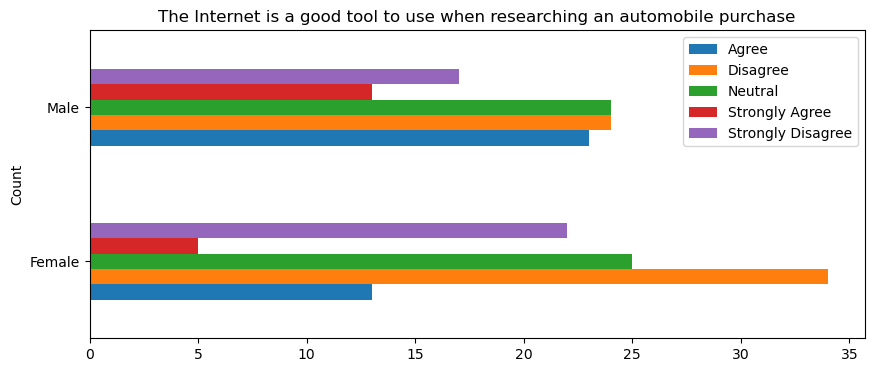

In [87]:
# plt.figure(figsize=(10, 3))  # Set the desired size 
# Create the bar chart
gender_grouped_intrnt_prchs.plot(kind='barh',figsize=(10, 4))
plt.title('The Internet is a good tool to use when researching an automobile purchase')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.xlim(0,100)
plt.show()


In [98]:
# Count purchases by gender
gender_grouped_no_prchs_v = df.groupby("Your gender is...")['The Internet should not be used to purchase vehicles.'].value_counts(normalize=True).mul(100) \
    .round(0) \
    .astype(int) \
    .unstack(fill_value=0)
gender_grouped_no_prchs_v = gender_grouped_no_prchs_v.map(lambda v: f'{v}%')
gender_grouped_no_prchs_v



C:\Users\itenis\AppData\Local\Temp\ipykernel_32532\3016429416.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_grouped_no_prchs_v = df.groupby("Your gender is...")['The Internet should not be used to purchase vehicles.'].value_counts(normalize=True).mul(100) \


The Internet should not be used to purchase vehicles.,Agree,Disagree,Neutral,Strongly Agree,Strongly Disagree
Your gender is...,,,,,
Female,13%,13%,31%,29%,15%
Male,15%,15%,30%,22%,19%


In [99]:
# Count purchases by gender
gender_grouped_how_oftn_prchs = df.groupby("Your gender is...")['The Internet is a good tool to use when researching an automobile purchase.'].value_counts(normalize=True).mul(100) \
    .round(0) \
    .astype(int) \
    .unstack(fill_value=0)
gender_grouped_how_oftn_prchs = gender_grouped_how_oftn_prchs.map(lambda v: f'{v}%')
gender_grouped_how_oftn_prchs



C:\Users\itenis\AppData\Local\Temp\ipykernel_32532\490142627.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_grouped_how_oftn_prchs = df.groupby("Your gender is...")['How often do you make purchases through the Internet?'].value_counts(normalize=True).mul(100) \


How often do you make purchases through the Internet?,Almost never,Never,Occasionally,Often,Very often
Your gender is...,,,,,
Female,32%,30%,22%,16%,0%
Male,22%,17%,23%,23%,15%


In [ ]:
# print(rsrch_auto_prchs.columns)
# Combine 'Agree' and 'Strongly Agree'
rsrch_auto_prchs['Count'] = pd.to_numeric(rsrch_auto_prchs['Count'], errors='coerce')
print(rsrch_auto_prchs)
agree_strng_agree=rsrch_auto_prchs[rsrch_auto_prchs['Category'].isin(['Agree', 'Strongly Agree'])]['Count'].sum()/len(df)*100
agree_strng_agree
# gender_grouped_rsch_prchs = df.groupby("Your gender is...")['The Internet is a good tool to use when researching an automobile purchase.'].value_counts(normalize=True).mul(100) \
#     .round(0) \
#     .astype(int) \
#     .unstack(fill_value=0)
# gender_grouped_rsch_prchs
# # Append '%' to all values in the DataFrame
# # gender_grouped_intrnt_prchs = gender_grouped_intrnt_prchs.map(lambda v: int( f'{v}%'))